In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib notebook

In [40]:
date_of_samples = "2021-06-16_11-16"

df_real_swipes = pd.read_csv(f"data/{date_of_samples}_realSwipes.csv")
df_real_swipes_normalized = pd.read_csv(f"data/{date_of_samples}_realSwipesNormalized.csv")

df_gan_swipes = pd.read_csv(f"data/{date_of_samples}_ganSwipes.csv")
df_gan_swipes_normalized = pd.read_csv(f"data/{date_of_samples}_ganSwipesNormalized.csv")

df_test_swipes = pd.read_csv(f"data/{date_of_samples}_testSwipes.csv")
df_test_swipes_normalized = pd.read_csv(f"data/{date_of_samples}_testSwipesNormalized.csv")

df_real_results = pd.read_csv(f"data/{date_of_samples}_realResults.csv").drop("id", axis=1)
df_gan_results = pd.read_csv(f"data/{date_of_samples}_ganResults.csv").drop("id", axis=1)
df_test_results = pd.read_csv(f"data/{date_of_samples}_testResults.csv").drop("id", axis=1)

df_real_swipes_numbered = df_real_swipes.copy().drop("id", axis=1)
df_real_swipes_numbered.columns = [f'{i:02d}__{x}' for i, x in enumerate(df_real_swipes_numbered.columns, 1)]
df_real_swipes_normalized_numbered = df_real_swipes_normalized.copy().drop("id", axis=1)
df_real_swipes_normalized_numbered.columns = [f'{i:02d}__{x}' for i, x in enumerate(df_real_swipes_normalized_numbered.columns, 1)]

df_gan_swipes_numbered = df_gan_swipes.copy().drop("id", axis=1)
df_gan_swipes_numbered.columns = [f'{i:02d}_{x}' for i, x in enumerate(df_gan_swipes_numbered.columns, 1)]
df_gan_swipes_normalized_numbered = df_gan_swipes_normalized.copy().drop("id", axis=1)
df_gan_swipes_normalized_numbered.columns = [f'{i:02d}_{x}' for i, x in enumerate(df_gan_swipes_normalized_numbered.columns, 1)]

df_test_swipes_numbered = df_test_swipes.copy().drop("id", axis=1)
df_test_swipes_numbered.columns = [f'{i:02d}_{x}' for i, x in enumerate(df_test_swipes_numbered.columns, 1)]
df_test_swipes_normalized_numbered = df_test_swipes_normalized.copy().drop("id", axis=1)
df_test_swipes_normalized_numbered.columns = [f'{i:02d}_{x}' for i, x in enumerate(df_test_swipes_normalized_numbered.columns, 1)]



In [62]:
df_real_long = df_real_swipes_normalized_numbered.melt()
#df_real_long = df_real_swipes_normalized.melt()
df_real_long["variable"] = df_real_long["variable"] + "_real"
df_real_long

,variable,value
0,01__duration_real,0.183667
1,01__duration_real,0.176333
2,01__duration_real,0.176000
3,01__duration_real,0.164000
4,01__duration_real,0.127167
...,...,...
160,33__var_pressure_real,0.000000
161,33__var_pressure_real,0.000000
162,33__var_pressure_real,0.000000
163,33__var_pressure_real,0.000000


In [63]:
df_gan_long = df_gan_swipes_normalized_numbered.melt()
#df_gan_long = df_gan_swipes_normalized.melt()
df_gan_long["variable"] = df_gan_long["variable"] + "_gan"
df_gan_long

,variable,value
0,01_duration_gan,1.472863e-01
1,01_duration_gan,1.462742e-01
2,01_duration_gan,1.471588e-01
3,01_duration_gan,1.463074e-01
4,01_duration_gan,1.489442e-01
...,...,...
1645,33_var_pressure_gan,5.948079e-07
1646,33_var_pressure_gan,5.869493e-07
1647,33_var_pressure_gan,5.988913e-07
1648,33_var_pressure_gan,5.946429e-07


In [64]:
df_long = pd.concat([df_real_long, df_gan_long], ignore_index=True)
df_long_first_16_features = df_long[df_long["variable"].apply(lambda x: float(x.split('_')[0])) < 17]
df_long_first_16_features = df_long_first_16_features.sort_values(by="variable")
df_long_last_16_features = df_long[df_long["variable"].apply(lambda x: float(x.split('_')[0])) >= 17]
df_long_last_16_features = df_long_last_16_features.sort_values(by="variable")

<IPython.core.display.Javascript object>


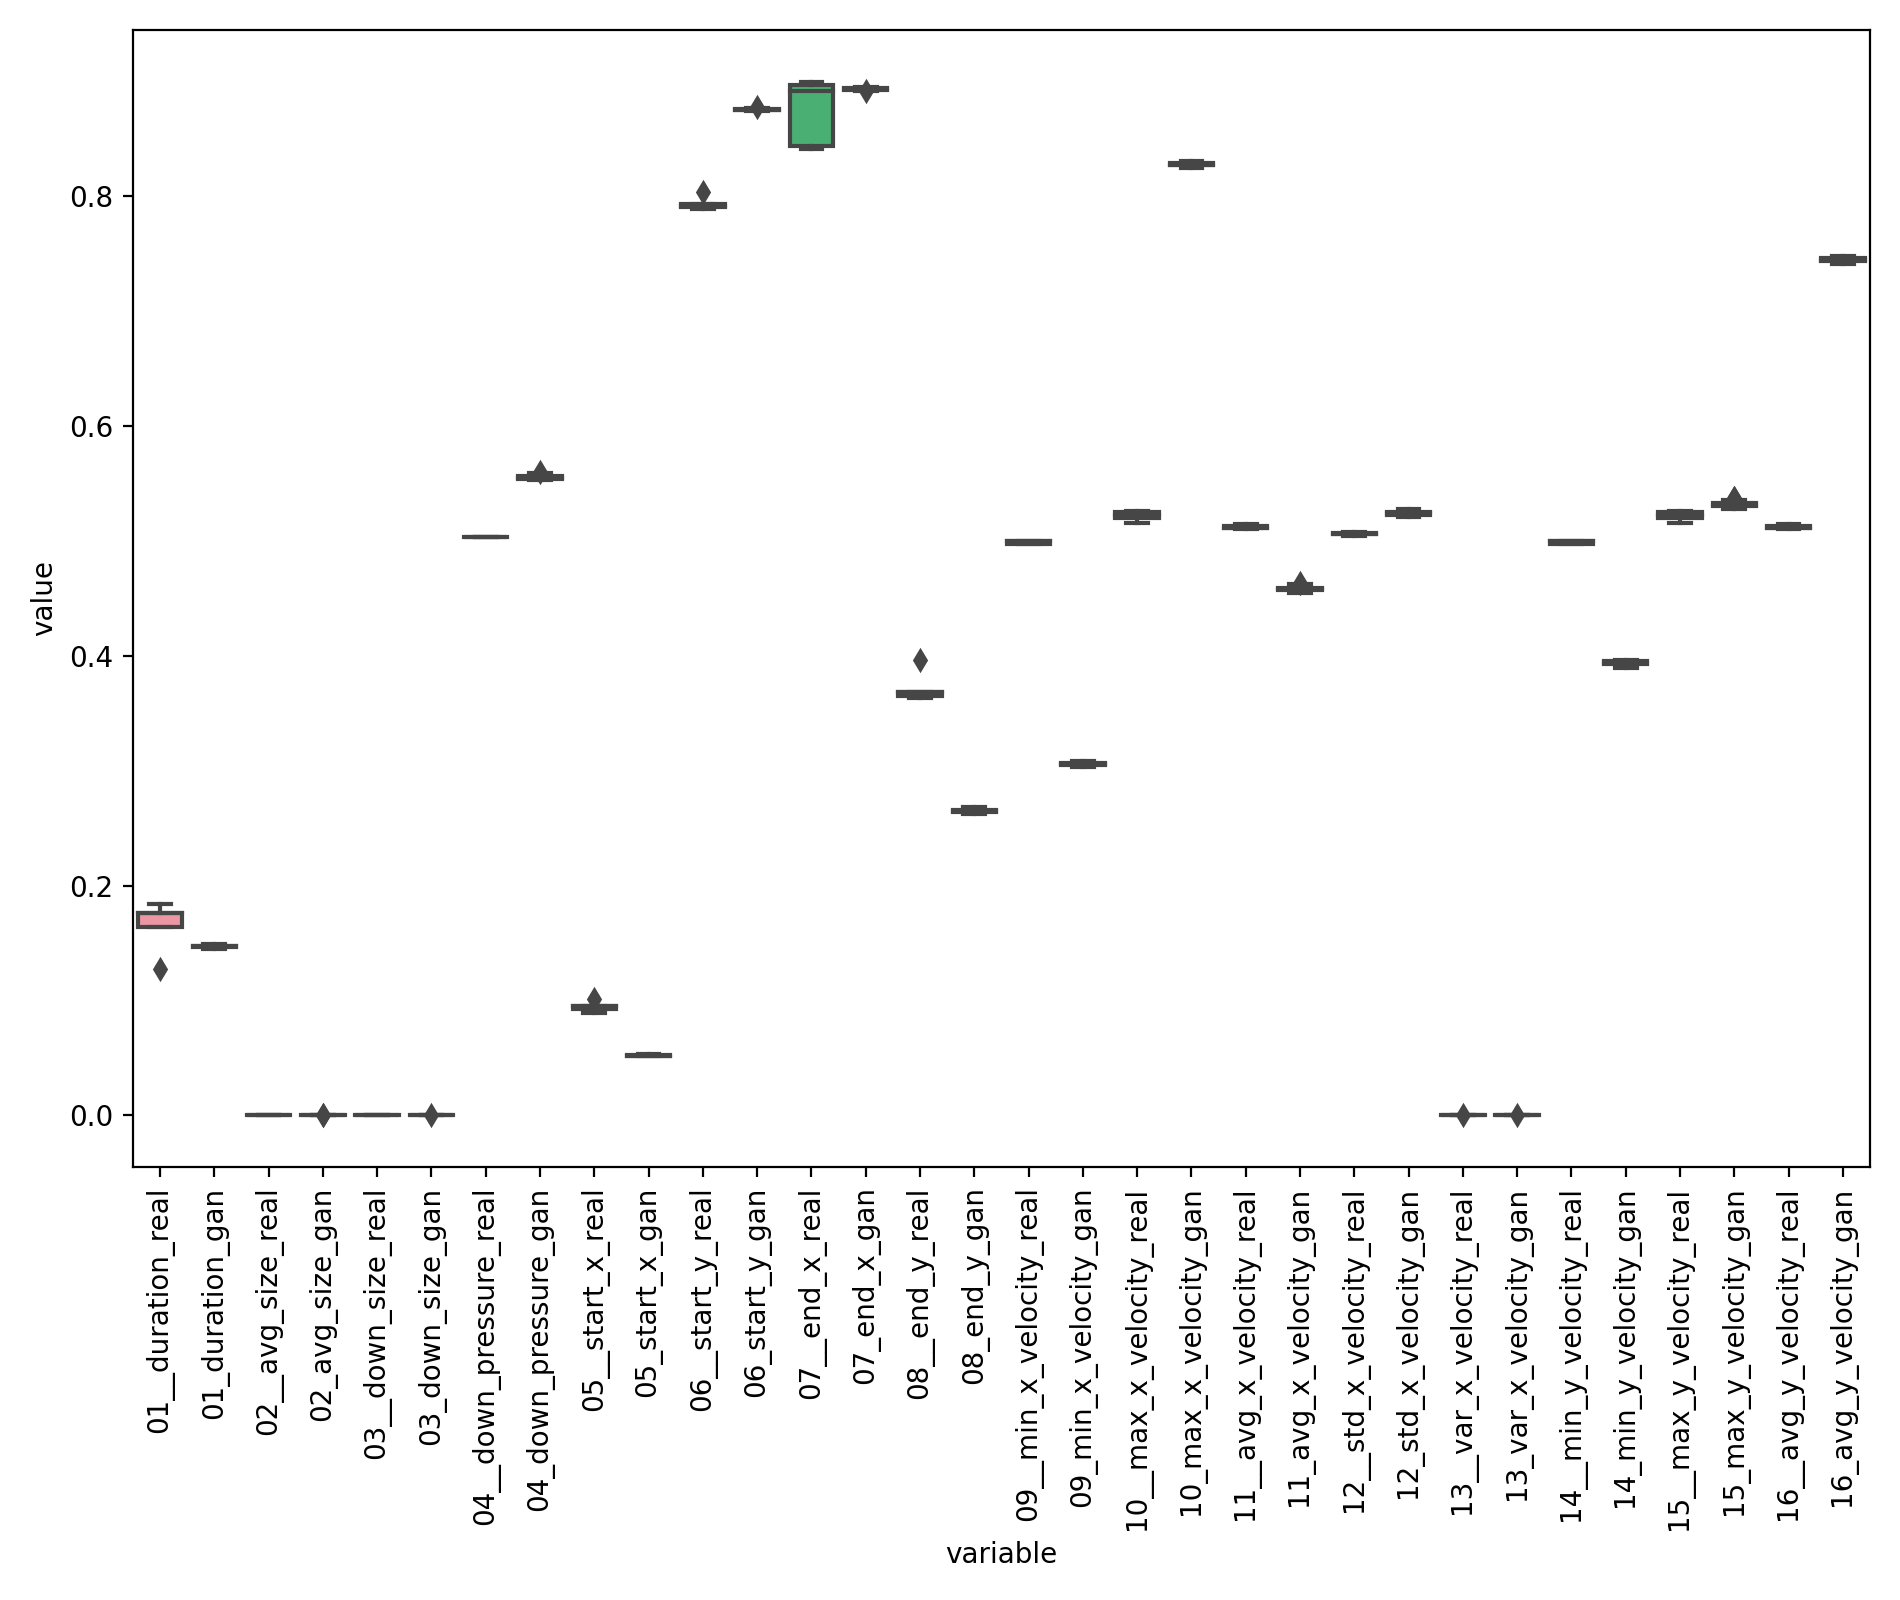

In [65]:
f, ax = plt.subplots(1,1,figsize=(9.5,8))
plt.xticks(rotation=90)
ax = sns.boxplot(data=df_long_first_16_features, x="variable", y="value")
plt.tight_layout()

<IPython.core.display.Javascript object>


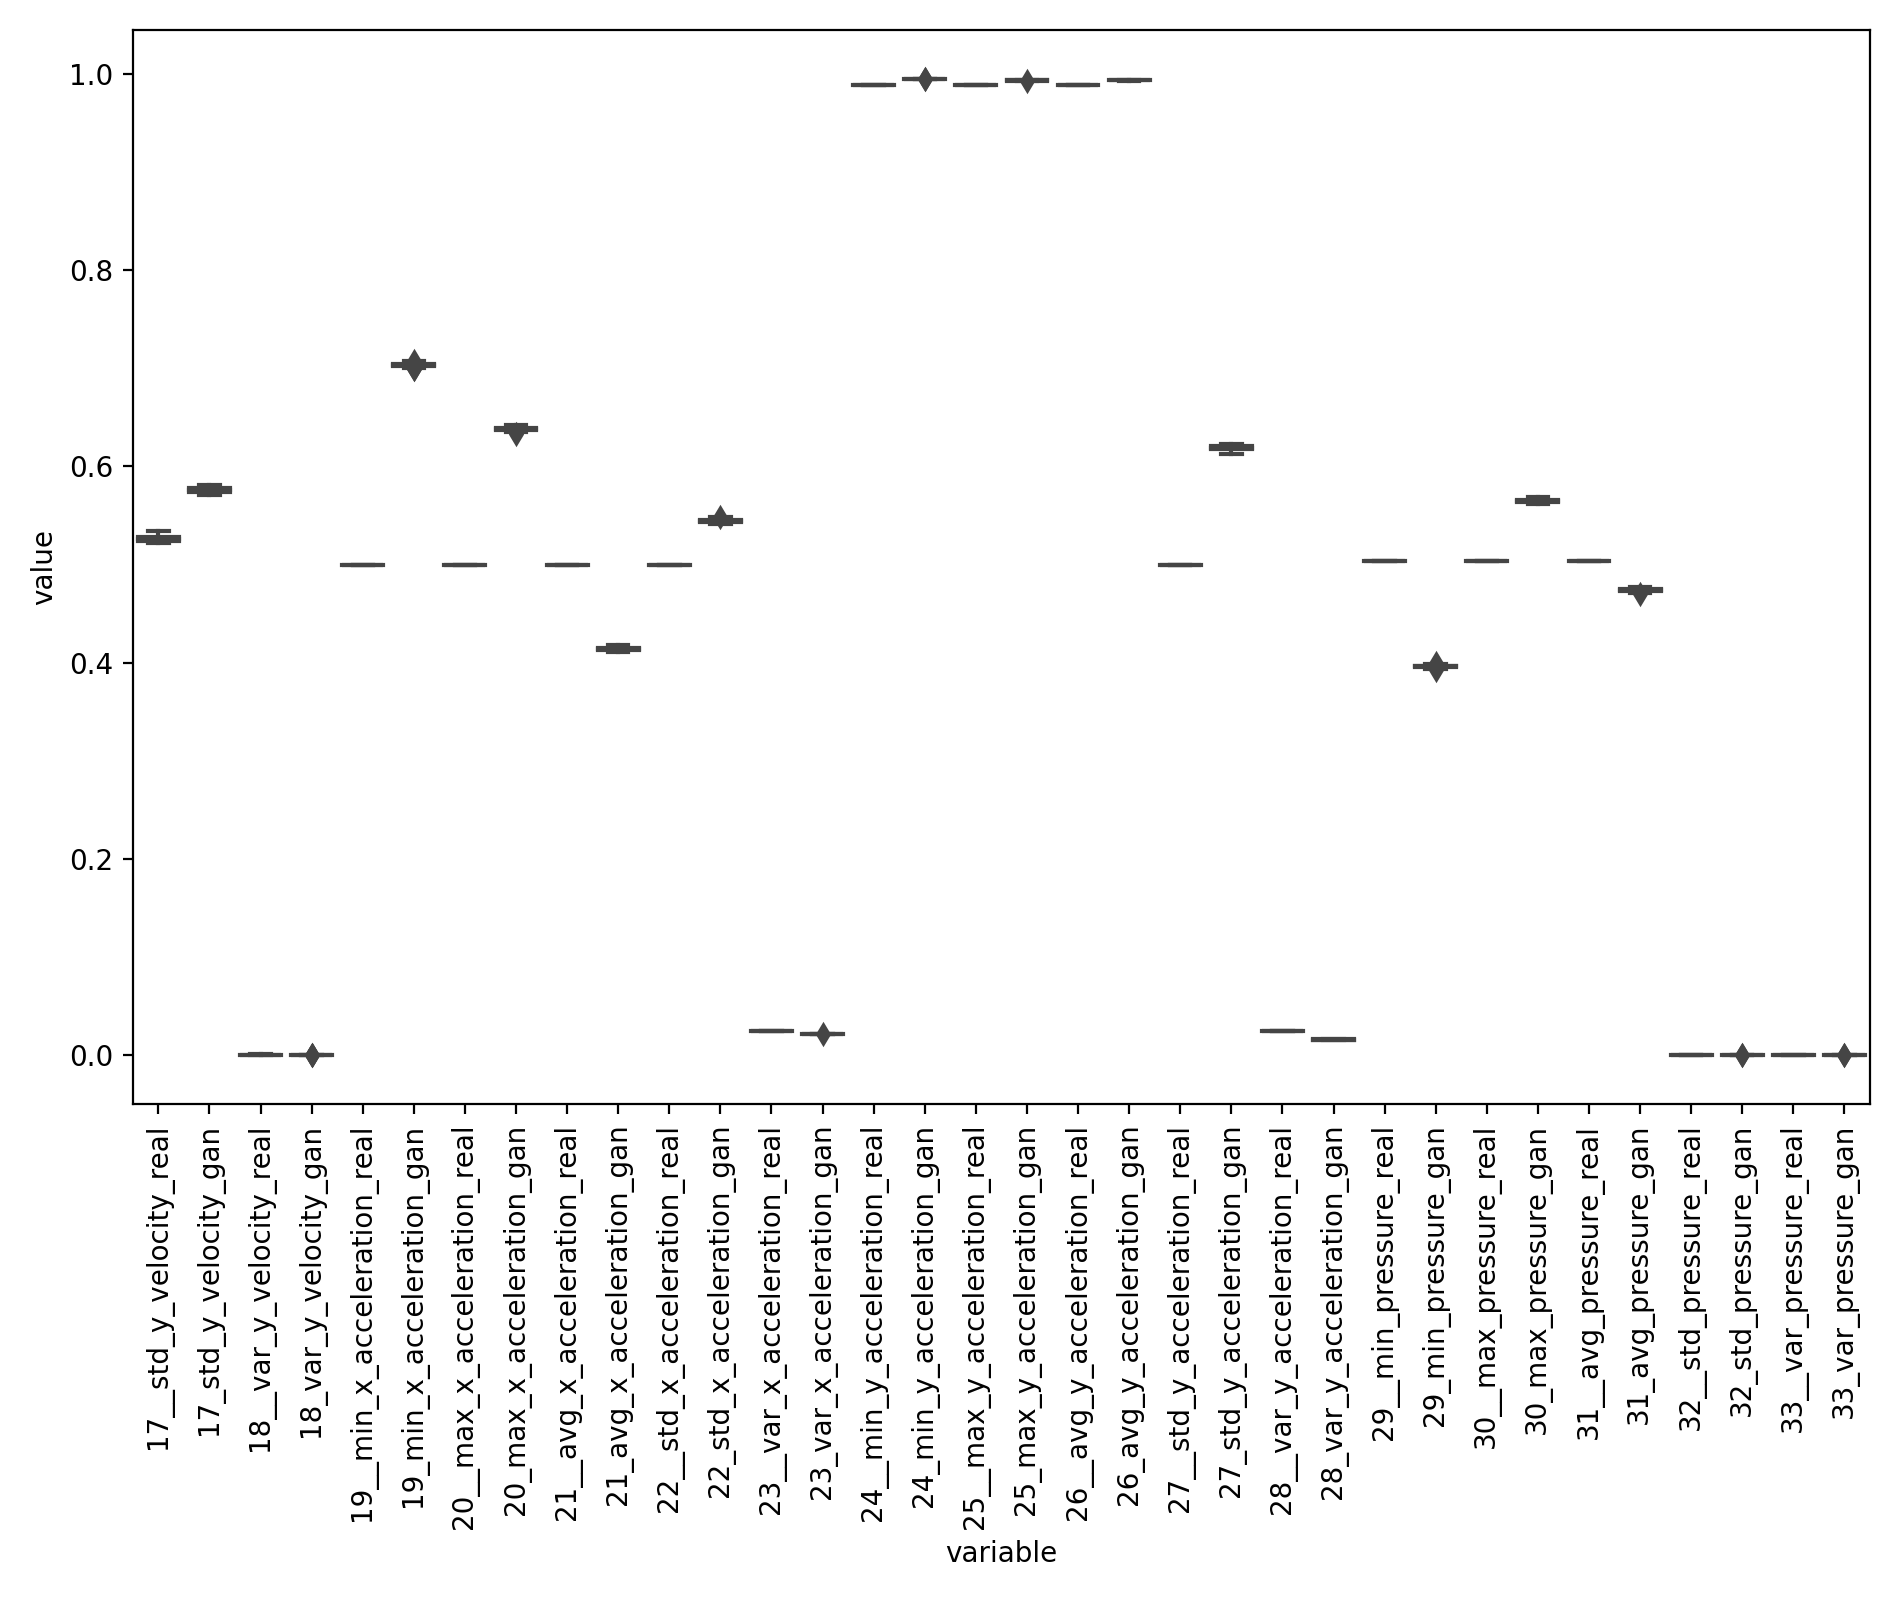

In [66]:
f, ax = plt.subplots(1,1,figsize=(9.5,8))
plt.xticks(rotation=90)
ax = sns.boxplot(data=df_long_last_16_features, x="variable", y="value")
plt.tight_layout()

# Testing normalization

In [46]:
MIN_DURATION = 0
MAX_DURATION = 6000

MIN_START_X = 0
MAX_START_X = 1080
MIN_START_Y = 0
MAX_START_Y = 2088

MIN_END_X = 0
MAX_END_X = 1080
MIN_END_Y = 0
MAX_END_Y = 2088

MIN_X_VELOCITY = -50_000
MAX_X_VELOCITY = 50_000
MIN_Y_VELOCITY = -50_000
MAX_Y_VELOCITY = 50_000

MIN_X_ACCELERATION = -10
MAX_X_ACCELERATION = 10
MIN_Y_ACCELERATION = -10
MAX_Y_ACCELERATION = 10

In [47]:
df_real_swipes = pd.read_csv(f"data/{date_of_samples}_realSwipes.csv")
df_real_swipes_normalized_new = df_real_swipes.copy()


In [48]:
df_real_swipes_normalized_new.duration = (df_real_swipes_normalized_new.duration - MIN_DURATION) / (MAX_DURATION - MIN_DURATION)
df_real_swipes_normalized_new.avg_size = df_real_swipes_normalized_new.avg_size
df_real_swipes_normalized_new.down_size = df_real_swipes_normalized_new.down_size
df_real_swipes_normalized_new.down_pressure = df_real_swipes_normalized_new.down_pressure
df_real_swipes_normalized_new.start_x = (df_real_swipes_normalized_new.start_x - MIN_START_X) / (MAX_START_X - MIN_START_X)
df_real_swipes_normalized_new.start_y = (df_real_swipes_normalized_new.start_y - MIN_START_Y) / (MAX_START_Y - MIN_START_Y)
df_real_swipes_normalized_new.end_x = (df_real_swipes_normalized_new.end_x - MIN_END_X) / (MAX_END_X - MIN_END_X)
df_real_swipes_normalized_new.end_y = (df_real_swipes_normalized_new.end_y - MIN_END_Y) / (MAX_END_Y - MIN_END_Y)
df_real_swipes_normalized_new.min_x_velocity = (df_real_swipes_normalized_new.min_x_velocity - MIN_X_VELOCITY) / (MAX_X_VELOCITY - MIN_X_VELOCITY)
df_real_swipes_normalized_new.max_x_velocity = (df_real_swipes_normalized_new.max_x_velocity - MIN_X_VELOCITY) / (MAX_X_VELOCITY - MIN_X_VELOCITY)
df_real_swipes_normalized_new.avg_x_velocity = (df_real_swipes_normalized_new.avg_x_velocity - MIN_X_VELOCITY) / (MAX_X_VELOCITY - MIN_X_VELOCITY)
df_real_swipes_normalized_new.std_x_velocity = (df_real_swipes_normalized_new.std_x_velocity - MIN_X_VELOCITY) / (MAX_X_VELOCITY - MIN_X_VELOCITY)
df_real_swipes_normalized_new.var_x_velocity = (df_real_swipes_normalized_new.var_x_velocity - MIN_X_VELOCITY) / ((MAX_X_VELOCITY - MIN_X_VELOCITY) * (MAX_X_VELOCITY - MIN_X_VELOCITY))
df_real_swipes_normalized_new.min_y_velocity = (df_real_swipes_normalized_new.min_y_velocity - MIN_Y_VELOCITY) / (MAX_Y_VELOCITY - MIN_Y_VELOCITY)
df_real_swipes_normalized_new.max_y_velocity = (df_real_swipes_normalized_new.max_y_velocity - MIN_Y_VELOCITY) / (MAX_Y_VELOCITY - MIN_Y_VELOCITY)
df_real_swipes_normalized_new.avg_y_velocity = (df_real_swipes_normalized_new.avg_y_velocity - MIN_Y_VELOCITY) / (MAX_Y_VELOCITY - MIN_Y_VELOCITY)
df_real_swipes_normalized_new.std_y_velocity = (df_real_swipes_normalized_new.std_y_velocity - MIN_Y_VELOCITY) / (MAX_Y_VELOCITY - MIN_Y_VELOCITY)
df_real_swipes_normalized_new.var_y_velocity = (df_real_swipes_normalized_new.var_y_velocity - MIN_Y_VELOCITY) / ((MAX_Y_VELOCITY - MIN_Y_VELOCITY) * (MAX_Y_VELOCITY - MIN_Y_VELOCITY))
df_real_swipes_normalized_new.min_x_acceleration = (df_real_swipes_normalized_new.min_x_acceleration - MIN_X_ACCELERATION) / (MAX_X_ACCELERATION - MIN_X_ACCELERATION)
df_real_swipes_normalized_new.max_x_acceleration = (df_real_swipes_normalized_new.max_x_acceleration - MIN_X_ACCELERATION) / (MAX_X_ACCELERATION - MIN_X_ACCELERATION)
df_real_swipes_normalized_new.avg_x_acceleration = (df_real_swipes_normalized_new.avg_x_acceleration - MIN_X_ACCELERATION) / (MAX_X_ACCELERATION - MIN_X_ACCELERATION)
df_real_swipes_normalized_new.std_x_acceleration = (df_real_swipes_normalized_new.std_x_acceleration - MIN_X_ACCELERATION) / (MAX_X_ACCELERATION - MIN_X_ACCELERATION)
df_real_swipes_normalized_new.var_x_acceleration = (df_real_swipes_normalized_new.var_x_acceleration - MIN_X_ACCELERATION) / ((MAX_X_ACCELERATION - MIN_X_ACCELERATION) * (MAX_X_ACCELERATION - MIN_X_ACCELERATION))
df_real_swipes_normalized_new.min_y_acceleration = (df_real_swipes_normalized_new.min_y_acceleration - MIN_Y_ACCELERATION) / (MAX_Y_ACCELERATION - MIN_Y_ACCELERATION)
df_real_swipes_normalized_new.max_y_acceleration = (df_real_swipes_normalized_new.max_y_acceleration - MIN_Y_ACCELERATION) / (MAX_Y_ACCELERATION - MIN_Y_ACCELERATION)
df_real_swipes_normalized_new.avg_y_acceleration = (df_real_swipes_normalized_new.avg_y_acceleration - MIN_Y_ACCELERATION) / (MAX_Y_ACCELERATION - MIN_Y_ACCELERATION)
df_real_swipes_normalized_new.std_y_acceleration = (df_real_swipes_normalized_new.std_y_acceleration - MIN_Y_ACCELERATION) / (MAX_Y_ACCELERATION - MIN_Y_ACCELERATION)
df_real_swipes_normalized_new.var_y_acceleration = (df_real_swipes_normalized_new.var_y_acceleration - MIN_Y_ACCELERATION) / ((MAX_Y_ACCELERATION - MIN_Y_ACCELERATION) * (MAX_Y_ACCELERATION - MIN_Y_ACCELERATION))
df_real_swipes_normalized_new.min_pressure = df_real_swipes_normalized_new.min_pressure
df_real_swipes_normalized_new.max_pressure = df_real_swipes_normalized_new.max_pressure
df_real_swipes_normalized_new.avg_pressure = df_real_swipes_normalized_new.avg_pressure
df_real_swipes_normalized_new.std_pressure = df_real_swipes_normalized_new.std_pressure
df_real_swipes_normalized_new.var_pressure = df_real_swipes_normalized_new.var_pressure



In [54]:
df_real_swipes_normalized

,id,duration,avg_size,down_size,down_pressure,start_x,start_y,end_x,end_y,min_x_velocity,...,min_y_acceleration,max_y_acceleration,avg_y_acceleration,std_y_acceleration,var_y_acceleration,min_pressure,max_pressure,avg_pressure,std_pressure,var_pressure
0,1.0,0.183667,3.725290e-09,3.725290e-09,0.503906,0.092560,0.792093,0.891632,0.363470,0.497042,...,0.988816,0.988816,0.988816,0.5,0.025,0.503906,0.503906,0.503906,0.0,0.0
1,2.0,0.176333,4.190952e-09,4.190952e-09,0.503906,0.095367,0.793553,0.897186,0.368272,0.497765,...,0.988816,0.988816,0.988816,0.5,0.025,0.503906,0.503906,0.503906,0.0,0.0
2,3.0,0.176000,4.656613e-09,4.656613e-09,0.503906,0.088867,0.804065,0.899963,0.368272,0.500000,...,0.988816,0.988816,0.988816,0.5,0.025,0.503906,0.503906,0.503906,0.0,0.0
3,4.0,0.164000,6.053597e-09,6.053597e-09,0.503906,0.095367,0.788750,0.841614,0.396533,0.499996,...,0.988816,0.988816,0.988816,0.5,0.025,0.503906,0.503906,0.503906,0.0,0.0
4,5.0,0.127167,6.519258e-09,6.519258e-09,0.503906,0.100922,0.790665,0.844391,0.364930,0.499960,...,0.988816,0.988816,0.988816,0.5,0.025,0.503906,0.503906,0.503906,0.0,0.0


In [55]:
df_real_swipes_normalized_new

,id,duration,avg_size,down_size,down_pressure,start_x,start_y,end_x,end_y,min_x_velocity,...,min_y_acceleration,max_y_acceleration,avg_y_acceleration,std_y_acceleration,var_y_acceleration,min_pressure,max_pressure,avg_pressure,std_pressure,var_pressure
0,1.0,0.183667,3.725290e-09,3.725290e-09,0.503906,0.092560,0.792093,0.891632,0.363470,0.497042,...,0.988816,0.988816,0.988816,0.5,0.025,0.503906,0.503906,0.503906,0.0,0.0
1,2.0,0.176333,4.190952e-09,4.190952e-09,0.503906,0.095367,0.793553,0.897186,0.368272,0.497765,...,0.988816,0.988816,0.988816,0.5,0.025,0.503906,0.503906,0.503906,0.0,0.0
2,3.0,0.176000,4.656613e-09,4.656613e-09,0.503906,0.088867,0.804065,0.899963,0.368272,0.500000,...,0.988816,0.988816,0.988816,0.5,0.025,0.503906,0.503906,0.503906,0.0,0.0
3,4.0,0.164000,6.053597e-09,6.053597e-09,0.503906,0.095367,0.788750,0.841614,0.396533,0.499996,...,0.988816,0.988816,0.988816,0.5,0.025,0.503906,0.503906,0.503906,0.0,0.0
4,5.0,0.127167,6.519258e-09,6.519258e-09,0.503906,0.100922,0.790665,0.844391,0.364930,0.499960,...,0.988816,0.988816,0.988816,0.5,0.025,0.503906,0.503906,0.503906,0.0,0.0


In [61]:
#df_real_swipes_normalized.compare(df_real_swipes_normalized_new).to_csv("Test2.csv", sep=";", decimal=",")

In [60]:
#df_real_swipes_normalized.compare(df_real_swipes).to_csv("Test.csv", sep=";", decimal=",")